# **Histogram Representations**

####**In this lesson we'll learn:**
1. View the RGB Histogram representations of images
2. Use K-Means Clustering to get the dominant colors and their proportions in images


### **Great Blog:**
- https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html (Theory+Usage)
- https://medium.com/@rndayala/image-histograms-in-opencv-40ee5969a3b7 (Histogram equalization for Contrasting)
- https://www.kaggle.com/code/mukeshmanral/opencv-image-histograms (Applications)

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-08 05:06:50--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.94
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.7MB/s    in 1.5s    

2023-05-08 05:06:52 (18.7 MB/s) - ‘images.zip’ saved [29586716/29586716]



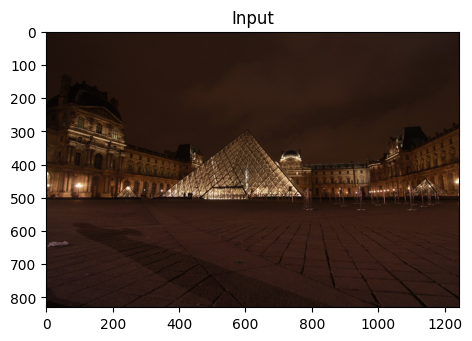

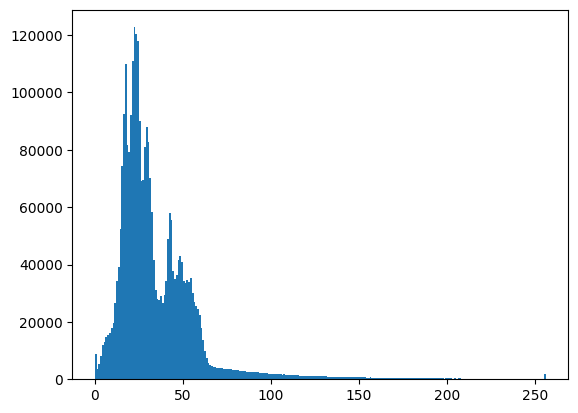

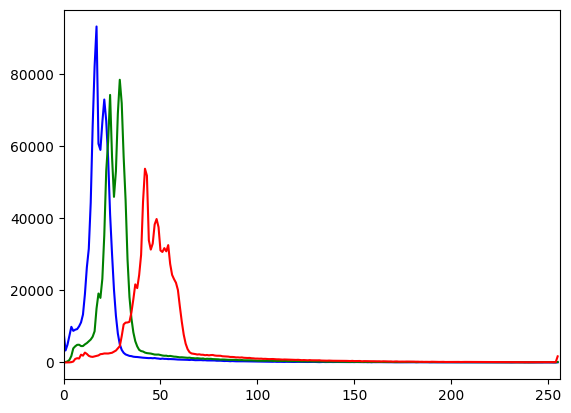

In [2]:
image = cv2.imread('images/input.jpg')
imshow("Input", image)

# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

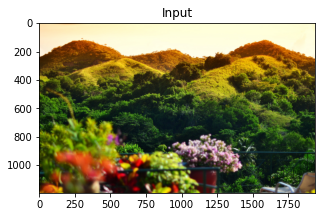

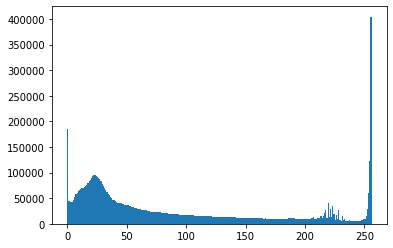

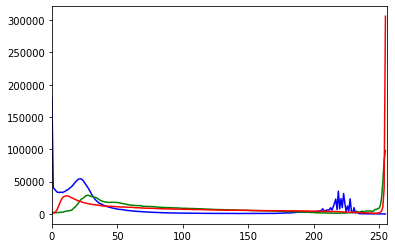

In [ ]:
image = cv2.imread('images/tobago.jpg')
imshow("Input", image)

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

## **K-Means Clustering to obtain the dominant colors in an image**

In [3]:
def centroidHistogram(clt):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram 
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    # iterate over the percentage and dominant color of each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
      end = x_start + (percent * 500)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end
    return bar

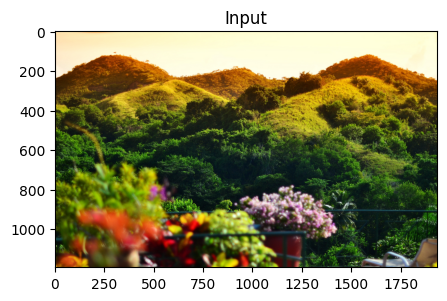

(1194, 1936, 3)
(2311584, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


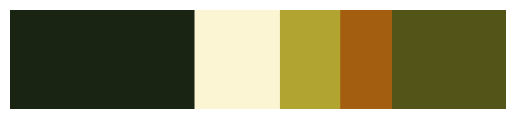

In [4]:
from sklearn.cluster import KMeans

image = cv2.imread('images/tobago.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

### **Let's try another image**

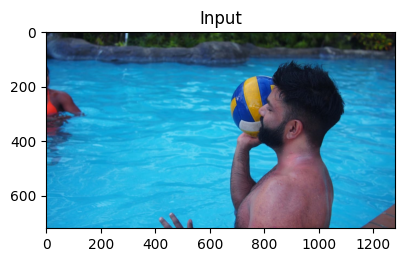

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


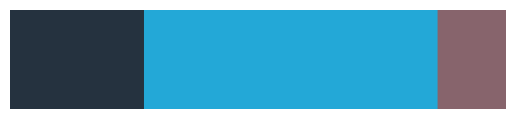

In [5]:
from sklearn.cluster import KMeans

image = cv2.imread('images/Volleyball.jpeg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_clusters = 3
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()